# MobileFaceSwap Playground 🎮

- References : [Official MobileFaceSwap](https://github.com/Seanseattle/MobileFaceSwap)

## 💻 GPU 환경설정

> [런타임]-[런타임 유형 변경]-[하드웨어 가속기]를 반드시 `GPU`로 설정하세요.
>
> [런타임 구성]을 `RAM`에서 `고용량 RAM`으로 변환하면 더욱 좋습니다.

## 💾 프로젝트 환경설정

> Github에서 프로젝트 코드와 사전 학습된 모델을 다운로드 합니다.
>
> 설치가 필요한 라이브러리를 pip install을 통해 설치합니다.

> 23-03-30 
>
> paddlepaddle-gpu 최신 버전 사용
>
> insightface 0.2.1ver -> 0.7.3버전 사용
>
> DeepFace 라이브러리를 사용할 경우 protobuf 3.20.3으로 업데이트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/ /"
!apt-get update
!apt-get -y install cuda-10.2

In [ ]:
# !git clone https://github.com/takhyun12/MobileFaceSwap
# %cd /content/MobileFaceSwap

!git clone https://github.com/hardok00/deepfaketest_kst
%cd /content/deepfaketest_kst

!wget https://github.com/takhyun12/MobileFaceSwap/releases/download/checkpoints/checkpoints.zip

!mkdir /content/deepfaketest_kst/checkpoints
!unzip /content/deepfaketest_kst/checkpoints.zip -d /content/deepfaketest_kst/checkpoints

!mkdir /content/deepfaketest_kst/asset
!mkdir /content/deepfaketest_kst/results

In [ ]:
# !pip install paddlepaddle-gpu==2.1.2
!pip install paddlepaddle-gpu # 2.4.2
!pip install -U insightface # 0.7.3 버전
# !pip install insightface==0.2.1
!pip install onnxruntime
!pip install mediapipe

# !pip install deepface
# !pip install protobuf==3.20.3

## 📁 **이미지 업로드**

> target 이미지와 source 이미지(바꾸고자 하는 얼굴)를 각기 1장씩 업로드합니다.
>
> 이미지는 `MoblieFaceSwap/asset` 하위에 업로드되게 됩니다.
>
> verify를 사용할 경우 비교할 얼굴들을 업로드합니다.

## ⚡ 소스 이미지 업로드

In [ ]:
# Upload source image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

uploaded = files.upload()
source_image_path: str = next(iter(uploaded))

# source_image_path: str = "상경2.jpg"

from IPython.display import Image
Image(source_image_path)

## 🎈 이미지 딥페이크 단일 대상

In [ ]:
# Upload target image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

uploaded = files.upload()
target_image_path: str = next(iter(uploaded))

# target_image_path = "은지원.jpg"

# from IPython.display import Image
# Image(target_image_path)

%cd /content/deepfaketest_kst
!python image_test.py --target_img_path asset/$target_image_path --source_img_path asset/$source_image_path --output_dir results --use_gpu True

%cd /content/deepfaketest_kst/results
from IPython.display import Image
Image(target_image_path)

## 🖖 이미지 딥페이크 다중 대상

/content/deepfaketest_kst/asset


Saving 1박2일.jpg to 1박2일.jpg
/content/deepfaketest_kst
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keywo

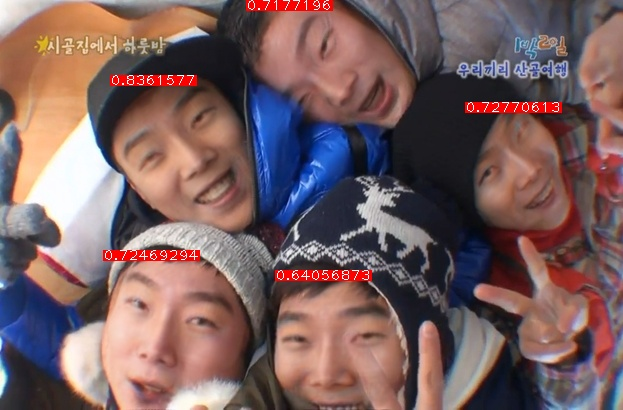

In [12]:
# Upload target image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

uploaded = files.upload()
target_image_path: str = next(iter(uploaded))

# target_image_path = "1박2일.jpg"

# from IPython.display import Image
# Image(target_image_path)

%cd /content/deepfaketest_kst
!python image_test_multi_face.py --target_img_path asset/$target_image_path --source_img_path asset/$source_image_path --output_dir results --use_gpu True

%cd /content/deepfaketest_kst/results
from IPython.display import Image
Image(target_image_path)

## 🖖 이미지 다중 블러처리

> utils 폴더에 prepare_data.py 새로 업로드 해야됨
>
> image_test_multi_face.py 새로 업로드 해야됨

/content/deepfaketest_kst/asset
/content/deepfaketest_kst
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#k

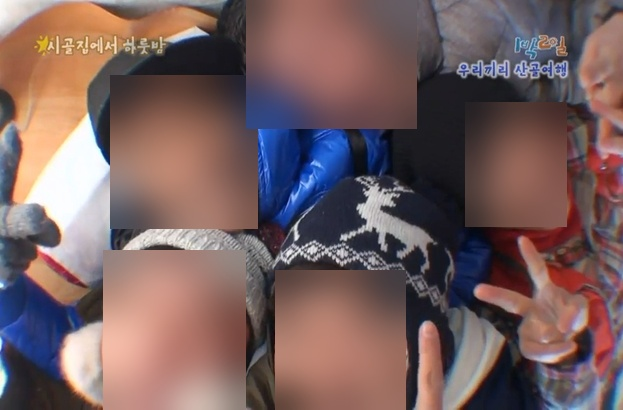

In [16]:
# Upload target image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

# uploaded = files.upload()
# target_image_path: str = next(iter(uploaded))

target_image_path = "1박2일.jpg"

# from IPython.display import Image
# Image(target_image_path)

%cd /content/deepfaketest_kst
!python image_test_multi_face_blur.py --target_img_path asset/$target_image_path --output_dir results --use_gpu True

%cd /content/deepfaketest_kst/results
from IPython.display import Image
Image(target_image_path)

## 🧅 이미지 딥페이크 다중 비교

> utils 폴더에 prepare_data_verify.py 새로 업로드 해야됨
>
> image_test_multi_face_verify.py 새로 업로드 해야됨

/content/deepfaketest_kst/asset
/content/deepfaketest_kst/asset/1박2일.jpg_verify_path
1 : 업로드 진행, 2: 업로드 종료 
1


Saving 은지원2.jpg to 은지원2.jpg
1 : 업로드 진행, 2: 업로드 종료 
1


Saving 이수근2.jpg to 이수근2.jpg
1 : 업로드 진행, 2: 업로드 종료 
1


Saving 강호동1.png to 강호동1.png
1 : 업로드 진행, 2: 업로드 종료 
2
/content/deepfaketest_kst
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/refer

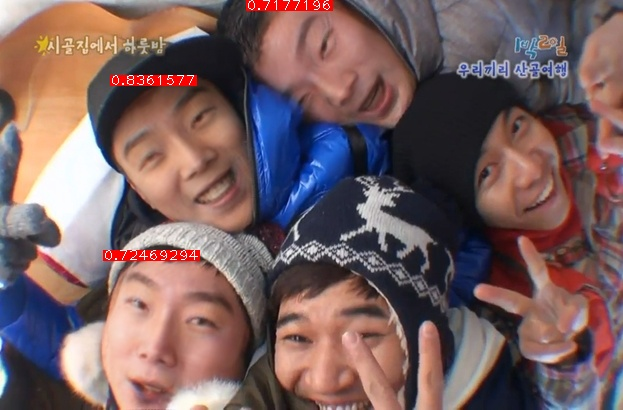

In [17]:
# Upload target image 
from google.colab import files
from IPython.display import Image
import os
import shutil

%cd /content/deepfaketest_kst/asset

# uploaded = files.upload()
# target_image_path: str = next(iter(uploaded))

target_image_path = "1박2일.jpg"

verify_path = target_image_path + "_verify_path"

if os.path.exists(verify_path):
    shutil.rmtree(verify_path)
os.makedirs(verify_path, exist_ok=True)

%cd /content/deepfaketest_kst/asset/$verify_path

while True:
    s = input('1 : 업로드 진행, 2: 업로드 종료 \n')
    if int(s) == 1:
        uploaded = files.upload()
    else:
        break
    
%cd /content/deepfaketest_kst
!python image_test_multi_face_verify.py --verify_img_path asset/$verify_path --target_img_path asset/$target_image_path --source_img_path asset/$source_image_path --output_dir results --use_gpu True

%cd /content/deepfaketest_kst/results
from IPython.display import Image
Image(target_image_path)

## 🧅 동영상 딥페이크 단일 대상

In [ ]:
# Upload target image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

uploaded = files.upload()
target_video_path: str = next(iter(uploaded))

# target_video_path: str = "살려는드릴게.mp4"

%cd /content/deepfaketest_kst
!python video_test.py --target_video_path asset/$target_video_path --source_img_path asset/$source_image_path --output_path results --use_gpu True

## 🥕 동영상 딥페이크 다중 대상

In [18]:
# Upload target image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

uploaded = files.upload()
target_video_path: str = next(iter(uploaded))

# target_video_path: str = "제기차기.mp4"

%cd /content/deepfaketest_kst
!python video_test_multi_face.py --target_video_path asset/$target_video_path --source_img_path asset/$source_image_path --output_path results --use_gpu True

/content/deepfaketest_kst/asset


Saving 2.mp4 to 2.mp4
/content/deepfaketest_kst
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-nam

## 🧅 동영상 딥페이크 다중 비교

> utils 폴더에 prepare_data_verify.py 새로 업로드 해야됨
>
> video_test_multi_face_verify.py 새로 업로드 해야됨

In [ ]:
# Upload target image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

uploaded = files.upload()
target_video_path: str = next(iter(uploaded))

# target_video_path: str = "제기차기.mp4"

verify_path = target_video_path + "_verify_path"
if os.path.exists(verify_path):
    shutil.rmtree(verify_path)
os.makedirs(verify_path, exist_ok=True)

%cd /content/deepfaketest_kst/asset/$verify_path

while True:
    s = input('1 : 업로드 진행, 2: 업로드 종료 \n')
    if int(s) == 1:
        uploaded = files.upload()
    else:
        break

%cd /content/deepfaketest_kst
!python video_test_multi_face_verify.py --verify_img_path asset/$verify_path --target_video_path asset/$target_video_path --source_img_path asset/$source_image_path --output_path results --use_gpu True

In [25]:
# Upload target image 
from google.colab import files
from IPython.display import Image

%cd /content/deepfaketest_kst/asset

# uploaded = files.upload()
# target_video_path: str = next(iter(uploaded))

target_video_path = "2.mp4"

# from IPython.display import Image
# Image(target_video_path)

%cd /content/deepfaketest_kst
!python video_test_multi_face_blur.py --target_video_path asset/$target_video_path --output_path results --use_gpu True

/content/deepfaketest_kst/asset
/content/deepfaketest_kst
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#k

In [ ]:
files.download('/content/deepfaketest_kst/results/몇개고.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>